In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
! pip install pydrive


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive 
# author = GoogleAuth()
# author.LocalWebserverAuth() 
# drive = GoogleDrive(author)

# file_id = 'https://drive.google.com/file/d/1FCh9R1tCfwqf-7oAYw9d9SbMaZbV9H4G/view?usp=share_link' 
# file_name='Car details v3.csv'
# file = drive.CreateFile({'id': file_id})
# file.GetContentFile(file_name)

# # Load the CSV file into a pandas dataframe
# df = pd.read_csv(file_name)



In [4]:
df=pd.read_csv("Car details v3.csv")

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df.shape

(8128, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(7906, 13)

In [13]:
print(df['fuel'].value_counts())
print(df['seller_type'].value_counts())
print(df['transmission'].value_counts())
print(df['seats'].value_counts())
print(df['mileage'].value_counts())
print(df['name'].value_counts())
print(df['owner'].value_counts())

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64
Manual       6865
Automatic    1041
Name: transmission, dtype: int64
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64
18.9 kmpl      225
19.7 kmpl      173
18.6 kmpl      164
21.1 kmpl      157
17.0 kmpl      133
              ... 
16.34 kmpl       1
19.69 kmpl       1
20.88 km/kg      1
17.8 km/kg       1
16.51 kmpl       1
Name: mileage, Length: 393, dtype: int64
Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC        

In [14]:
#Drop some columns that actually not need i.e. engine,seats,torque
#in that  case we will different comapnay name and model 
df[['Brand', 'Model']] = df['name'].str.split(' ', 1, expand=True)
df['mileage']=df['mileage'].str.split(' ').str.get(0)
print(df['mileage'])
df['mileage']=df['mileage'].astype(float)
print(df['mileage'])
df=df.drop(['name'],axis=1)
df=df.drop(['torque','engine','max_power'],axis=1)
print(df)

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 7906, dtype: object
0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 7906, dtype: float64
      year  selling_price  km_driven    fuel seller_type transmission  \
0     2014         450000     145500  Diesel  Individual       Manual   
1     2014         370000     120000  Diesel  Individual       Manual   
2     2006         158000     140000  Petrol  Individual       Manual   
3     2010         225000     127000  Diesel  Individual       Manual   
4     2007         130000     120000  Petrol  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
8123  2013         320000     110000  Petrol  Individual       Manual   
8124  2007         13

C:\Users\shant\AppData\Local\Temp\ipykernel_14396\3517751090.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Brand', 'Model']] = df['name'].str.split(' ', 1, expand=True)


In [15]:
print(df['Brand'].value_counts())
print(df['Model'].value_counts())

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: Brand, dtype: int64
Swift Dzire VDI                          129
Alto 800 LXI                              82
Alto LXi                                  71
X4 M Sport X xDrive20d                    62
Swift VDI                                 61
                                        ... 
Jazz 1.2 S AT i VTEC  

In [16]:
df["make_country"] = 'Other'
df.loc[df.Brand.isin(['Maruti', 'Mahindra', 'Tata', 'Force', 'Ambassador', 'Ashok']), "make_country"] = 'India'
df.loc[df.Brand.isin(['Honda', 'Toyota', 'Nissan', 'Lexus', 'Isuzu', 'Mitsubishi', 'Datsun']), "make_country"] = 'Japan'
df.loc[df.Brand.isin([ 'Ford', 'Chevrolet', 'Jeep']), "make_country"] = 'America'
df.loc[df.Brand.isin([ 'Kia', 'Daewoo','Hyundai']), "make_country"] = 'South Korea'
df.loc[df.Brand.isin(['Volkswagen', 'BMW', 'Skoda', 'Mercedes-Benz', 'Audi', 'Opel']), "make_country"] = 'Germany'
df.loc[df.Brand.isin(['Jaguar', 'Land']), "make_country"] = 'UK'
df.loc[df.Brand.isin(['Volvo','MG','Fiat','Renault']), "make_country"] = 'Other'


In [17]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,Brand,Model,make_country
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,5.0,Maruti,Swift Dzire VDI,India
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,5.0,Skoda,Rapid 1.5 TDI Ambition,Germany
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,5.0,Honda,City 2017-2020 EXi,Japan
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,5.0,Hyundai,i20 Sportz Diesel,South Korea
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,5.0,Maruti,Swift VXI BSIII,India
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,5.0,Hyundai,i20 Magna,South Korea
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,5.0,Hyundai,Verna CRDi SX,South Korea
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,5.0,Maruti,Swift Dzire ZDi,India
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,5.0,Tata,Indigo CR4,India


In [18]:
df.dropna()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,seats,Brand,Model,make_country
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,5.0,Maruti,Swift Dzire VDI,India
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,5.0,Skoda,Rapid 1.5 TDI Ambition,Germany
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,5.0,Honda,City 2017-2020 EXi,Japan
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,5.0,Hyundai,i20 Sportz Diesel,South Korea
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,5.0,Maruti,Swift VXI BSIII,India
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,5.0,Hyundai,i20 Magna,South Korea
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,5.0,Hyundai,Verna CRDi SX,South Korea
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,5.0,Maruti,Swift Dzire ZDi,India
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,5.0,Tata,Indigo CR4,India


In [19]:
df=df.drop_duplicates()
print(df)
df=df.reset_index(drop=True)

      year  selling_price  km_driven    fuel seller_type transmission  \
0     2014         450000     145500  Diesel  Individual       Manual   
1     2014         370000     120000  Diesel  Individual       Manual   
2     2006         158000     140000  Petrol  Individual       Manual   
3     2010         225000     127000  Diesel  Individual       Manual   
4     2007         130000     120000  Petrol  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
8121  2013         260000      50000  Petrol  Individual       Manual   
8122  2014         475000      80000  Diesel  Individual       Manual   
8123  2013         320000     110000  Petrol  Individual       Manual   
8124  2007         135000     119000  Diesel  Individual       Manual   
8125  2009         382000     120000  Diesel  Individual       Manual   

                     owner  mileage  seats    Brand  \
0              First Owner    23.40    5.0   Maruti   
1            

In [20]:
# df.drop("make_country", axis = "columns", inplace = True)

In [21]:
#Here Data Cleaning is done

In [22]:
fuel_ty=df['fuel']
seller_ty=df['seller_type']
transmission_ty=df['transmission']
selling_pri=df['selling_price']

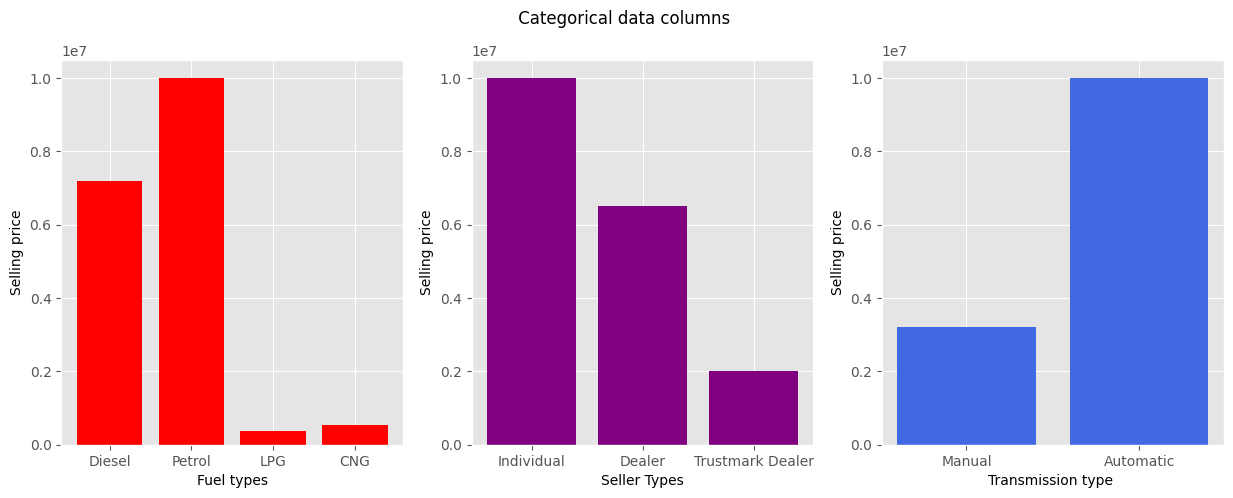

In [23]:
#Using ggplot from r language for histogram 
from matplotlib import style 
style.use('ggplot')
fig=plt.figure(figsize=(15,5))
fig.suptitle(" Categorical data columns ")
plt.subplot(1,3,1)
plt.bar(fuel_ty,selling_pri,color='red')
plt.xlabel('Fuel types')
plt.ylabel('Selling price')
plt.subplot(1,3,2)
plt.bar(seller_ty,selling_pri,color='purple')
plt.xlabel('Seller Types')
plt.ylabel('Selling price')
plt.subplot(1,3,3)
plt.bar(transmission_ty,selling_pri,color='royalblue')
plt.xlabel('Transmission type ')
plt.ylabel('Selling price')
plt.show()


<Axes: >

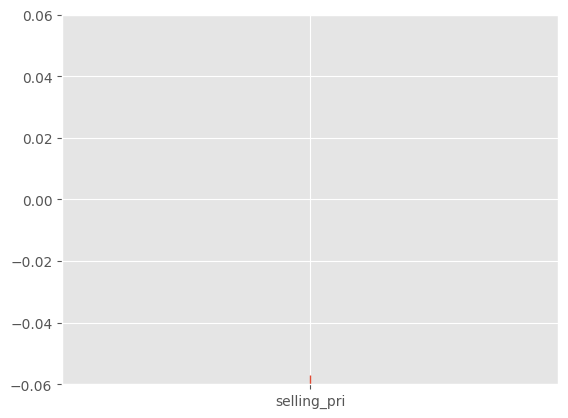

In [24]:
sns.rugplot('selling_pri')

In [25]:
#Regression starts works here
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [26]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
seats            float64
Brand             object
Model             object
make_country      object
dtype: object

In [27]:
#Convert categorical data into the numerical that's why we are using this 
onehot_cols=['fuel','seller_type','transmission','owner','Brand','Model', 'make_country']
# ohe=OneHotEncoder()
# col_trans=make_column_transformer(
#                                   (OneHotEncoder(sparse_output = False),onehot_cols),
#                                   remainder='passthrough')
# col_trans.fit(df)
# df = col_trans.transform(df)
# df.columns
for col in onehot_cols:
    encoder = OneHotEncoder(sparse=False)
    encoded_col = encoder.fit_transform(df[col].values.reshape(-1, 1))
    col_names = [f'{col}_{cat}' for cat in encoder.categories_[0]]
    encoded_df = pd.DataFrame(encoded_col, columns=col_names)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(col, axis=1, inplace=True)
print(df)

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocess

      year  selling_price  km_driven  mileage  seats  fuel_CNG  fuel_Diesel  \
0     2014         450000     145500    23.40    5.0       0.0          1.0   
1     2014         370000     120000    21.14    5.0       0.0          1.0   
2     2006         158000     140000    17.70    5.0       0.0          0.0   
3     2010         225000     127000    23.00    5.0       0.0          1.0   
4     2007         130000     120000    16.10    5.0       0.0          0.0   
...    ...            ...        ...      ...    ...       ...          ...   
6712  2013         260000      50000    18.90    5.0       0.0          0.0   
6713  2014         475000      80000    22.54    5.0       0.0          1.0   
6714  2013         320000     110000    18.50    5.0       0.0          0.0   
6715  2007         135000     119000    16.80    5.0       0.0          1.0   
6716  2009         382000     120000    19.30    5.0       0.0          1.0   

      fuel_LPG  fuel_Petrol  seller_type_Dealer  ..

c:\Users\shant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
col_trans.get_feature_names_out()

NameError: name 'col_trans' is not defined

In [ ]:
x=df.drop(['selling_price'],axis=1)
y=df['selling_price']



AttributeError: ignored

In [ ]:
print(x.shape)
y.shape

(6717, 2038)


(6717,)

In [ ]:
#Regression starts works here
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5373, 2038)
(1344, 2038)
(5373,)
(1344,)


In [ ]:
#Convert categorical data into the numerical that's why we are using this 
# ohe=OneHotEncoder()
# ohe.fit(x[['fuel','seller_type','transmission','owner']])
# col_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['fuel','seller_type','transmission','owner']),remainder='passthrough')

In [ ]:
# #standardize the data
# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)


In [ ]:
# lr=LinearRegression()

In [ ]:
# pipe=make_pipeline(col_trans,lr)
# pipe.fit(X_train,Y_train)

In [ ]:
metric_list = []

[ 522966.11206055  710381.38623047  321009.03149414 ...  382689.78881836
  499100.81738281 1140916.75732422]
--------------------------------------------
Coeff are : [ 3.13296511e+04 -1.85684903e-01  5.61893287e+03 ... -6.11522135e+11
  1.01022720e+12 -1.26211671e+12]
--------------------------------------------
Intercept  : -2138348766343.428
--------------------------------------------
train_accuracy_lr: 0.9755293635616568
--------------------------------------------
test_accuracy_lr: -48477011030.49028
--------------------------------------------
 Acuracy of Our Model is : -48477011030.49028
--------------------------------------------


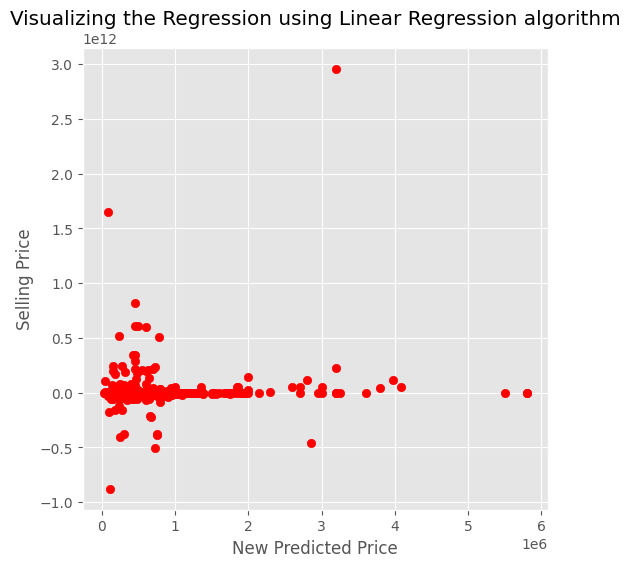

In [ ]:

#Linear Regression

lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
print(Y_pred)

train_accuracy_lr = lr.score(X_train, Y_train)
test_accuracy_lr = lr.score(X_test, Y_test)
r2_score_lr = r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",lr.coef_)
print("--------------------------------------------")
print("Intercept  :",lr.intercept_)
print("--------------------------------------------")
print('train_accuracy_lr:', train_accuracy_lr)
print("--------------------------------------------")
print('test_accuracy_lr:', test_accuracy_lr)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_lr)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Linear Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()






In [ ]:
print(len(lr.coef_))
print(len(X_train.columns))
# df_lt_importance[""]
df_lr_importance = pd.DataFrame()
df_lr_importance["var_name"] = X_train.columns
df_lr_importance["lr_importance"] = abs(lr.coef_)
df_lr_importance.sort_values(['lr_importance'], ascending = False)
df_lr_importance.to_csv('importance.csv')

2038
2038


[467199.95       624199.99       293544.99       ... 388599.85
 957509.98       948776.66666667]
--------------------------------------------
train_accuracy_rf: 0.9739289952702822
--------------------------------------------
test_accuracy_rf: 0.9010221340478712
--------------------------------------------
 Acuracy of Our Model is : 0.9010221340478712
--------------------------------------------


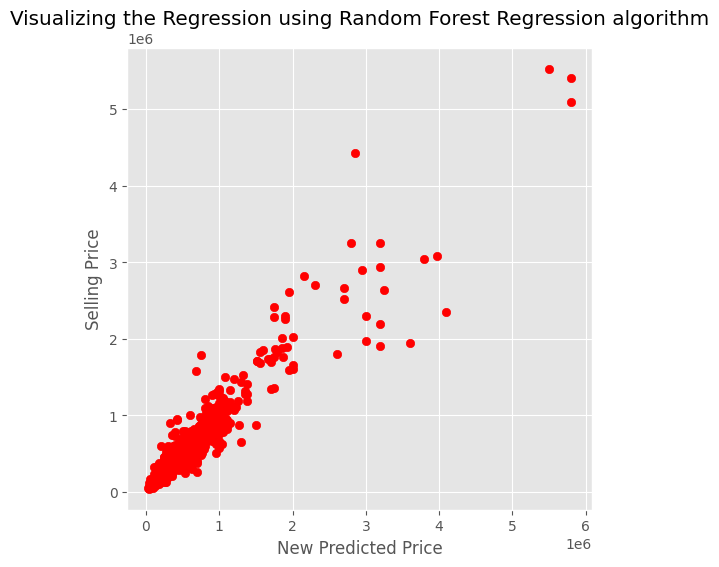

In [ ]:
#Random froest Regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
print(Y_pred)

train_accuracy_rf = rf.score(X_train, Y_train)
test_accuracy_rf= rf.score(X_test, Y_test)
r2_score_rf= r2_score(Y_test, Y_pred)
temp_list  = ["Rf", r2_score_rf, rmse, mae, mape]
metric_list.appen(temp_list)
#Random forest does not have coeff anf intercepts
#print("Coeff are :",rf.coef_)
#print("Intercept  :",rf.intercept_)
print("--------------------------------------------")
print('train_accuracy_rf:', train_accuracy_rf)
print("--------------------------------------------")
print('test_accuracy_rf:', test_accuracy_rf)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_rf)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

In [ ]:
df_lr_importance["rf_importance"] = rf.feature_importances_
df_lr_importance.to_csv("importance.csv")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+13, tolerance: 1.491e+11
  model = cd_fast.enet_coordinate_descent(


[ 522634.87025251  708237.56735181  321595.15414651 ...  382826.57473552
  456591.33680587 1140760.27886731]
--------------------------------------------
Coeff are : [ 3.14767326e+04 -1.85537649e-01  5.07311110e+03 ...  7.11406504e+03
  4.49452494e+03 -0.00000000e+00]
--------------------------------------------
Intercept  : -63020555.333097436
--------------------------------------------
train_accuracy_ls: 0.9755153341711764
--------------------------------------------
test_accuracy_ls: 0.8590303883815916
--------------------------------------------
 Acuracy of Our Model is : 0.8590303883815916
--------------------------------------------


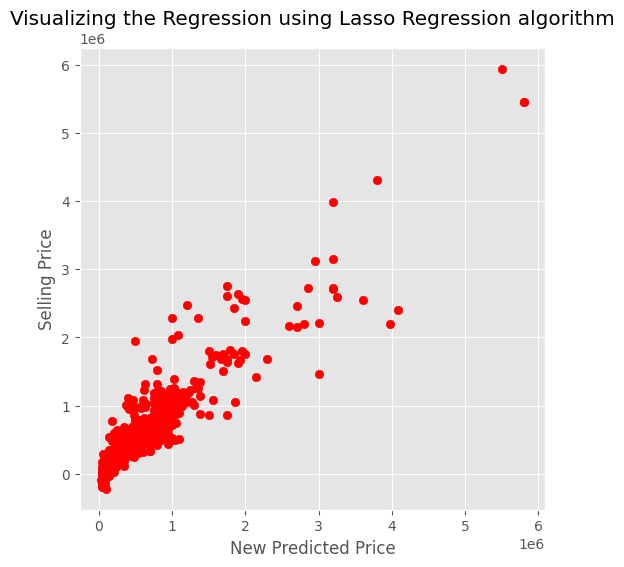

In [ ]:
#Lasso 
from sklearn.linear_model import Lasso
ls=Lasso(0.1)
ls.fit(X_train,Y_train)
Y_pred=ls.predict(X_test)
print(Y_pred)

train_accuracy_ls = ls.score(X_train, Y_train)
test_accuracy_ls= ls.score(X_test, Y_test)
r2_score_ls = r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",ls.coef_)
print("--------------------------------------------")
print("Intercept  :",ls.intercept_)
print("--------------------------------------------")
print('train_accuracy_ls:', train_accuracy_ls)
print("--------------------------------------------")
print('test_accuracy_ls:', test_accuracy_ls)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_ls)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Lasso Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[3.21799368e+17 6.53826978e+16 1.00476373e+17 ... 6.38249811e+16
 1.45226161e+17 5.90870747e+16]
--------------------------------------------
Coeff are : [ 1.81614466e+13  1.35880339e+12 -9.12674852e+10 ...  7.51352865e+10
  1.71373131e+11  5.18635140e+09]
--------------------------------------------
Intercept  : [8.62550907e+09]
--------------------------------------------
train_accuracy_sgd: -9.218126837774615e+22
--------------------------------------------
test_accuracy_sgd: -8.5884650823375e+22
--------------------------------------------
 Acuracy of Our Model is : -8.5884650823375e+22
--------------------------------------------


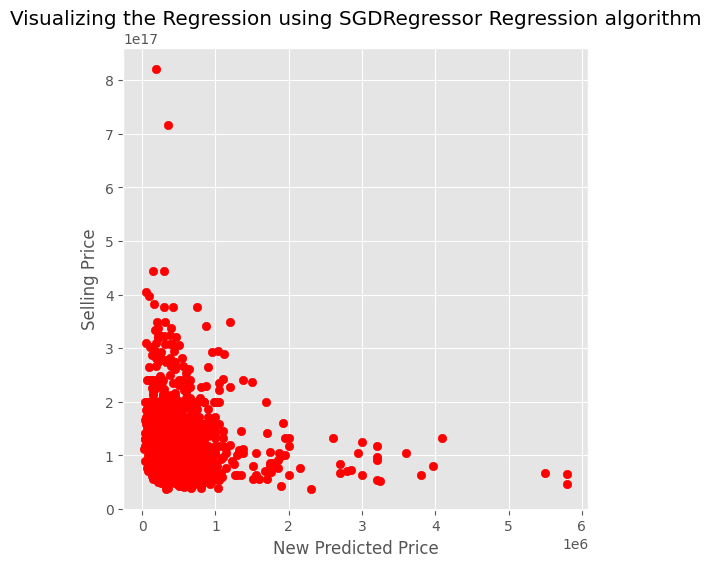

In [ ]:
#SGD Regressor 
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(loss="squared_error")
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
print(Y_pred)

train_accuracy_sgd = sgd.score(X_train, Y_train)
test_accuracy_sgd= sgd.score(X_test, Y_test)
r2_score_sgd= r2_score(Y_test, Y_pred)
print("--------------------------------------------")
print("Coeff are :",sgd.coef_)
print("--------------------------------------------")
print("Intercept  :",sgd.intercept_)
print("--------------------------------------------")
print('train_accuracy_sgd:', train_accuracy_sgd)
print("--------------------------------------------")
print('test_accuracy_sgd:', test_accuracy_sgd)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_sgd)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using SGDRegressor Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[ 486576.2566586  1123805.62695925  581973.21810345 ...  639507.31541389
 1323568.22539683  818877.88662791]
--------------------------------------------
train_accuracy_ada: 0.6137464774265465
--------------------------------------------
test_accuracy_ada: 0.6195048833910869
--------------------------------------------
 Acuracy of Our Model is : 0.6195048833910869
--------------------------------------------


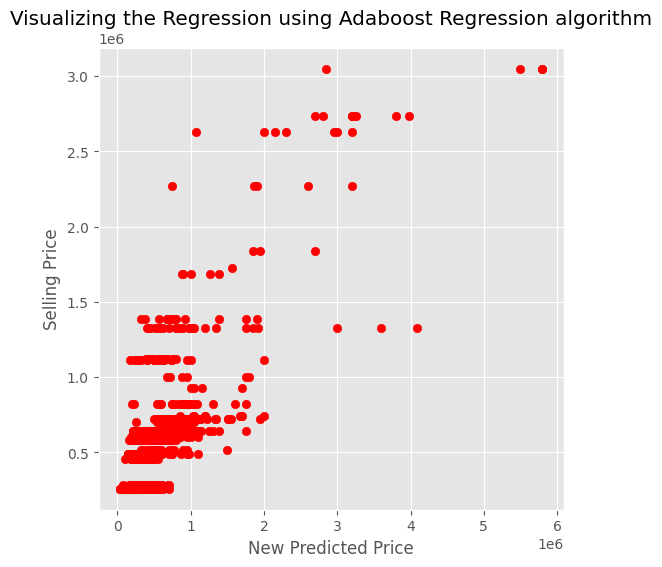

In [ ]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=10)
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)
print(Y_pred)

train_accuracy_ada = ada.score(X_train, Y_train)
test_accuracy_ada= ada.score(X_test, Y_test)
r2_score_ada= r2_score(Y_test, Y_pred)
#Adaboost does not have coeff and intedcept
#print("Coeff are :",ada.coef_)
#print("Intercept  :",ada.intercept_)
print("--------------------------------------------")
print('train_accuracy_ada:', train_accuracy_ada)
print("--------------------------------------------")
print('test_accuracy_ada:', test_accuracy_ada)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_ada)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Adaboost Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[486775.44 597623.44 362863.   ... 409993.5  432786.44 769907.94]
--------------------------------------------
train_accuracy_xgb: 0.9132664692790572
--------------------------------------------
test_accuracy_xgb: 0.8548150952984912
--------------------------------------------
 Acuracy of Our Model is : 0.8548150952984912
--------------------------------------------


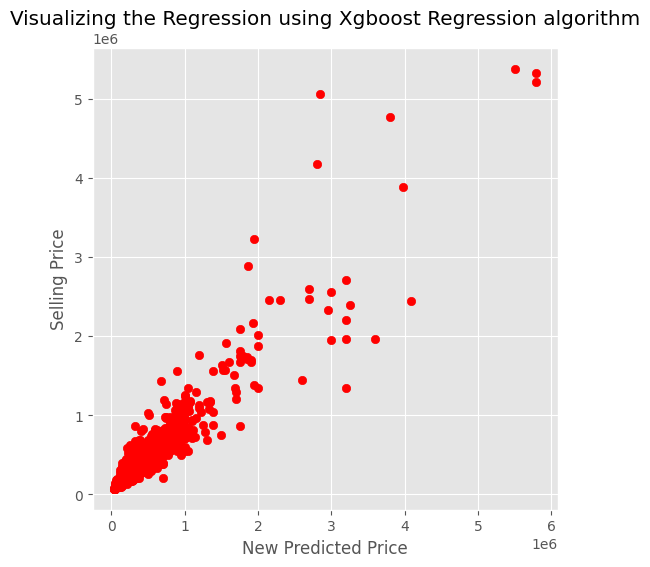

In [ ]:
#Xgboost
import xgboost as xg
xgb=xg.XGBRegressor(n_estimators=10)
xgb.fit(X_train,Y_train)
Y_pred=xgb.predict(X_test)
print(Y_pred)

train_accuracy_xgb = xgb.score(X_train, Y_train)
test_accuracy_xgb= xgb.score(X_test, Y_test)
r2_score_xgb= r2_score(Y_test, Y_pred)
#Xgboost regressor does not have coef and intercepts 
#print("Coeff are :",xgb.coef_)
#print("Intercept  :",xgb.intercept_)
print("--------------------------------------------")
print('train_accuracy_xgb:', train_accuracy_xgb)
print("--------------------------------------------")
print('test_accuracy_xgb:', test_accuracy_xgb)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_xgb)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Xgboost Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

[ 359799.9 1000999.9 1040999.9 ...  377800.   214499.9  747900. ]
--------------------------------------------
train_accuracy_kn: 0.37914356411853467
--------------------------------------------
test_accuracy_kn: 0.2865232849785804
--------------------------------------------
 Acuracy of Our Model is : 0.2865232849785804
--------------------------------------------


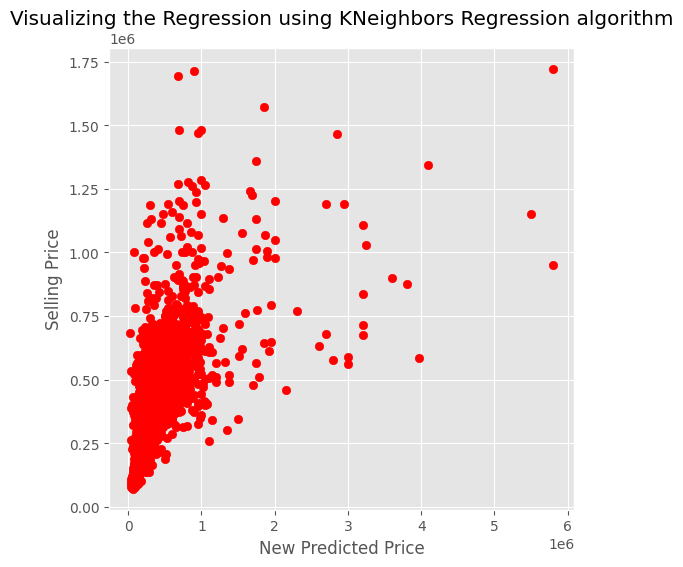

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=10)
kn.fit(X_train,Y_train)
Y_pred=kn.predict(X_test)
print(Y_pred)

train_accuracy_kn = kn.score(X_train, Y_train)
test_accuracy_kn= kn.score(X_test, Y_test)
r2_score_kn= r2_score(Y_test, Y_pred)
#KNeighbors does not hav an coefficeints and intercepts
#print("Coeff are :",kn.coef_)
#print("Intercept  :",kn.intercept_)
print("--------------------------------------------")
print('train_accuracy_kn:', train_accuracy_kn)
print("--------------------------------------------")
print('test_accuracy_kn:', test_accuracy_kn)
print("--------------------------------------------")
print(' Acuracy of Our Model is :', r2_score_kn)
print("--------------------------------------------")
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using KNeighbors Regression algorithm")
plt.scatter(Y_test,Y_pred, color = "red")
plt.xlabel("New Predicted Price")
plt.ylabel("Selling Price")
plt.show()

In [ ]:
with open('vehicle_price_prediction_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load the scaler
with open('input_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)








In [ ]:
!apt-get update
!apt-get install xvfb



In [ ]:
!pip install pyvirtualdisplay
!pip install matplotlib

In [ ]:
from pyvirtualdisplay import Display
from matplotlib import pyplot as plt

In [ ]:
display = Display(visible=0, size=(800, 600))
display.start()

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pickle

# Load the model and scaler
model = pickle.load(open('vehicle_price_prediction_model.pkl', 'rb'))
scaler = pickle.load(open('input_scaler.pkl', 'rb'))

# Create the GUI window
window = tk.Tk()
window.title('Vehicle Price Predictor')
window.geometry('400x300')
# Create labels and input fields for each feature
year_label = tk.Label(window, text='Year')
year_label.pack()
year_input = tk.Entry(window)
year_input.pack()

present_price_label = tk.Label(window, text='Present Price (in lakhs)')
present_price_label.pack()
present_price_input = tk.Entry(window)
present_price_input.pack()

kms_driven_label = tk.Label(window, text='Kms Driven')
kms_driven_label.pack()
kms_driven_input = tk.Entry(window)
kms_driven_input.pack()
'''
fuel_type_label = tk.Label(window, text='Fuel Type (Petrol=0, Diesel=1, CNG=2)')
fuel_type_label.pack()
fuel_type_input = tk.Entry(window)
fuel_type_input.pack()

seller_type_label = tk.Label(window, text='Seller Type (Dealer=0, Individual=1)')
seller_type_label.pack()
seller_type_input = tk.Entry(window)
seller_type_input.pack()

transmission_label = tk.Label(window, text='Transmission (Manual=0, Automatic=1)')
transmission_label.pack()
transmission_input = tk.Entry(window)
transmission_input.pack()

owner_label = tk.Label(window, text='Number of Owners')
owner_label.pack()
owner_input = tk.Entry(window)
owner_input.pack()
'''

# Function to predict the vehicle price
def predict_price():
    try:
        # Get input values and scale them
        year = float(year_input.get())
        present_price = float(present_price_input.get())
        kms_driven = float(kms_driven_input.get())
'''       
        fuel_type = float(fuel_type_input.get())
        seller_type = float(seller_type_input.get())
        transmission = float(transmission_input.get())
        owner = float(owner_input.get())
'''        
        
        scaled_values = scaler.transform([[year, present_price, kms_driven, fuel_type, seller_type, transmission, owner]])
        
        # Make prediction
        predicted_price = model.predict(scaled_values)
        
        # Display prediction
        messagebox.showinfo('Prediction', f'The predicted selling price of the vehicle is {predicted_price[0]:.2f} lakhs.')
        
    except Exception as e:
        messagebox.showerror('Error', 'Please enter valid values for all the features.')

# Create a button to predict the vehicle price
predict_button = tk.Button(window, text='Predict', command=predict_price)
predict_button.pack()

window.mainloop()

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/api/cars', methods=['POST'])
def submit_car_details():
    year = request.form['year']
    selling_price = request.form['selling_price']
    km_driven = request.form['km_driven']
    fuel = request.form['fuel']
    seller_type = request.form['seller_type']
    transmission = request.form['transmission']
    owner = request.form['owner']
    mileage = request.form['mileage']
    seats = request.form['seats']
    brand = request.form['brand']
    model = request.form['model']
    make_country = request.form['make_country']

    # Do something with the form data here...
    # For example, you could save it to a database or send an email notification

    return jsonify({'success': True})
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
!python --version

Python 3.9.16


In [ ]:
import pickle
print(pickle.format_version)

4.0


In [ ]:
with open('rf.pkl', 'wb') as file:
  pickle.dump(rf, file)